In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')
import itertools

In [3]:
df=pd.read_csv('product c.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [4]:
df.head(15)

,Product Name,Product Category,Month,Year,Sales,Market Size,Marketing Expense,Month No.
Month-Year,,,,,,,,
2019-01-01,Product C,Anti-Ulcer,January,2019,496334,1002744,1578266,1
2019-02-01,Product C,Anti-Ulcer,February,2019,306455,619142,974480,2
2019-03-01,Product C,Anti-Ulcer,March,2019,476270,962208,1514466,3
2019-04-01,Product C,Anti-Ulcer,April,2019,628463,1269687,1998416,4
2019-05-01,Product C,Anti-Ulcer,May,2019,366750,740950,1166209,5
2019-06-01,Product C,Anti-Ulcer,June,2019,352324,711811,1120336,6
2019-07-01,Product C,Anti-Ulcer,July,2019,657300,1327952,2090113,7
2019-08-01,Product C,Anti-Ulcer,August,2019,429552,867822,1365910,8
2019-09-01,Product C,Anti-Ulcer,September,2019,499906,1009971,1589625,9


In [5]:
sales_c= df.drop(['Product Name','Product Category','Month','Year','Month No.'],axis=1)

In [6]:
sales_c.shape

(60, 3)

In [7]:
sales_c.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Sales              60 non-null     int64
 1   Market Size        60 non-null     int64
 2   Marketing Expense  60 non-null     int64
dtypes: int64(3)
memory usage: 1.9 KB


In [8]:
print('Total Sales:', sales_c['Sales'].sum())
print('Total Market Size:',sales_c['Market Size'].sum())
print('Total Marketing Expense:', sales_c['Marketing Expense'].sum())

Total Sales: 45599092
Total Market Size: 75798227
Total Marketing Expense: 33224968


Text(0.5, 1.0, 'Product C')

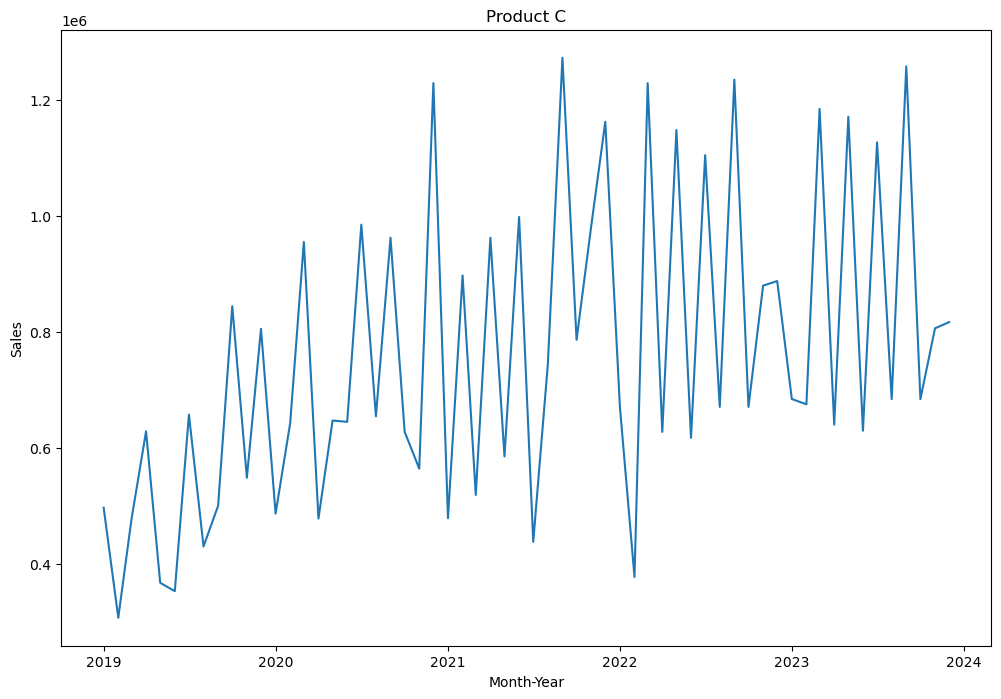

In [9]:
plt.figure(figsize=(12,8))
sns.lineplot(sales_c['Sales'])
plt.title('Product C')

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [12]:
adf_test(sales_c['Sales'])

ADF Statistics: -2.8900034461607835
p- value: 0.04652287109563067
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


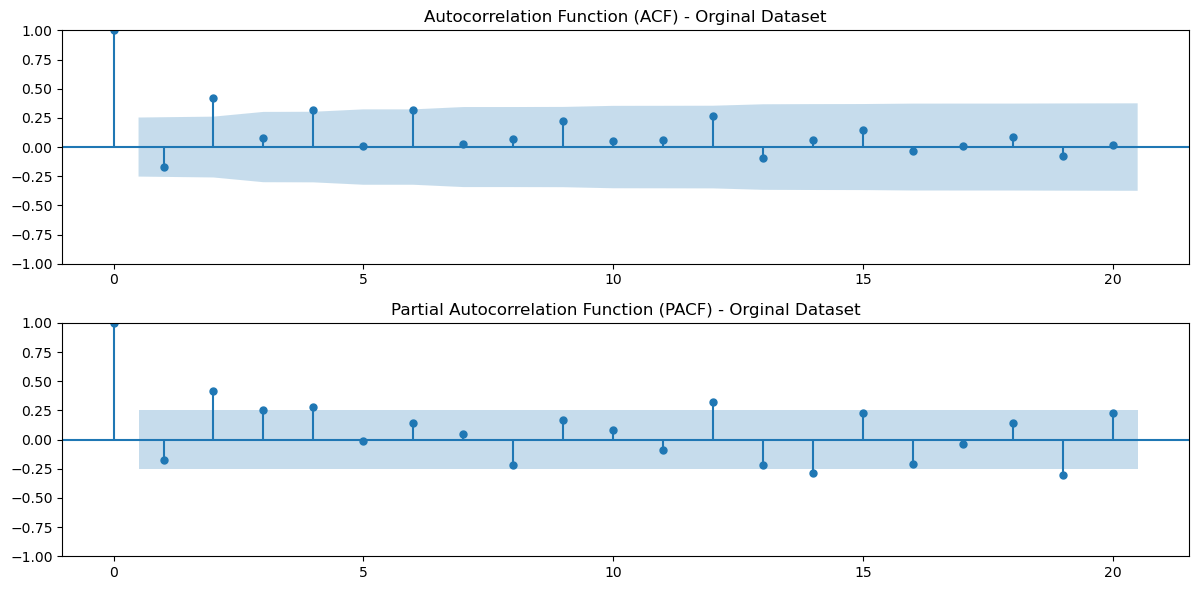

In [13]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_c['Sales'], lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Orginal Dataset')

plt.subplot(212)
plot_pacf(sales_c['Sales'], lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Orginal Dataset')

plt.tight_layout()
plt.show()

In [14]:
train= sales_c[:48]
test=sales_c[48:]

In [15]:
print(len(train), len(test))

48 12


In [16]:
#Finding the best value for ARIMA

#import itertools
#p=d=q=range(0,5)
#pdq = list(itertools.product(p,d,q))

#for param in pdq:
#    try:
#        model_arima = ARIMA(train,order=param)
#        model_arima_fit = model_arima.fit()
#       print(param,model_arima_fit.aic)
#    except:
#        continue
    
# The Akaike information criterion (AIC) is an estimator of in-sample prediction error and thereby relative quality of
# statistical models for a given set of data

# It's like the mean squared error in Regression - The smaller the number, the better

In [17]:
#therefore, the combination p=(0,1,2,3,4,5) d=1 q=(0,1,2,3) must be tested with accuracy metrics and aic

In [18]:
#param = [(0,1,0),(0,1,1),(0,1,2),(0,1,3),(1,1,0),(1,1,1),(1,1,2),(1,1,3),(2,1,0), (2,1,1), (2,1,2),(2,1,3),(3,1,0),(3,1,1),(3,1,2),(3,1,3),(4,1,0),(4,1,1),(4,1,2),(4,1,3),(5,1,0),(5,1,1),(5,1,2),(5,1,3)]

#for p in param:  # Changed 'x' to 'p'
#    model = ARIMA(train, order=p).fit()
#    pred = model.forecast(steps=len(test))
#    mae = mean_absolute_error(test, pred)
#    mape = np.mean(np.abs((test - pred) / test)) * 100
#    mse=mean_squared_error(test, pred)
#    rmse = np.sqrt(mean_squared_error(test, pred))
#    print(p)
#    print(f'MAE: {mae}')
#    print(f'MSE: {mse}')
#    print(f'RMSE: {rmse}')
#    print('A.I.C:', model.aic)

In [19]:
order=[]
for p in range(6):
    # Loop over MA order
    for q in range(4):
        # Fit model        
#       model= ARIMA(sales_b, order=(p,1,q))
        model_t = ARIMA(train['Sales'], order=(p,0,q), exog=train[['Market Size','Marketing Expense']])
        model_test=model_t.fit() 
        pred=model_test.predict(start=len(train), end=(len(sales_c)-1), exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mape = np.mean(np.abs((test['Sales'] - pred) / test)) * 100
        mse=mean_squared_error(test['Sales'], pred)
        rmse = np.sqrt(mean_squared_error(test['Sales'], pred))
        # Add order and scores to list        
        order.append((p, q, model_test.aic, model_test.bic,mae, mse, rmse))
#Make DataFrame of model order and AIC/BIC scores
order_df = pd.DataFrame(order, columns=['p','q', 'aic', 'bic', 'mae','mse', 'rmse'])

In [20]:
# Sort by AIC
print(order_df.sort_values('aic'))

    p  q          aic          bic           mae           mse          rmse
1   0  1  1263.327466  1272.683471  59489.089200  5.957715e+09  77186.238489
2   0  2  1265.201288  1276.428494  59507.187362  5.954358e+09  77164.488741
5   1  1  1265.315504  1276.542710  59503.298287  5.954391e+09  77164.702572
3   0  3  1266.789393  1279.887800  59532.442809  5.948923e+09  77129.263193
6   1  2  1267.092243  1280.190650  59503.316070  5.925403e+09  76976.640810
9   2  1  1267.139125  1280.237532  59513.443080  5.952863e+09  77154.802129
11  2  3  1268.404033  1285.244842  60794.372860  5.447566e+09  73807.629050
13  3  1  1268.705240  1283.674848  58826.737198  5.856966e+09  76530.816925
7   1  3  1268.757528  1283.727136  59486.787664  5.948649e+09  77127.485321
10  2  2  1268.982993  1283.952601  59465.059033  5.930496e+09  77009.713518
15  3  3  1269.483606  1288.195616  62789.936983  5.820662e+09  76293.261514
17  4  1  1270.785957  1287.626766  58388.361037  5.812471e+09  76239.563606

In [21]:
m_arima= ARIMA(train['Sales'], order=(0,0,1), exog=train[['Market Size','Marketing Expense']])
model_arima=m_arima.fit()
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -626.664
Date:                Thu, 09 May 2024   AIC                           1263.327
Time:                        16:11:40   BIC                           1272.683
Sample:                    01-01-2019   HQIC                          1266.863
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.815e+05   1.78e-07   1.02e+12      0.000    1.82e+05    1.82e+05
Market Size           0.5183      0.003    160.409      0.000       0.512       0.525
Marketing Expense    -0.

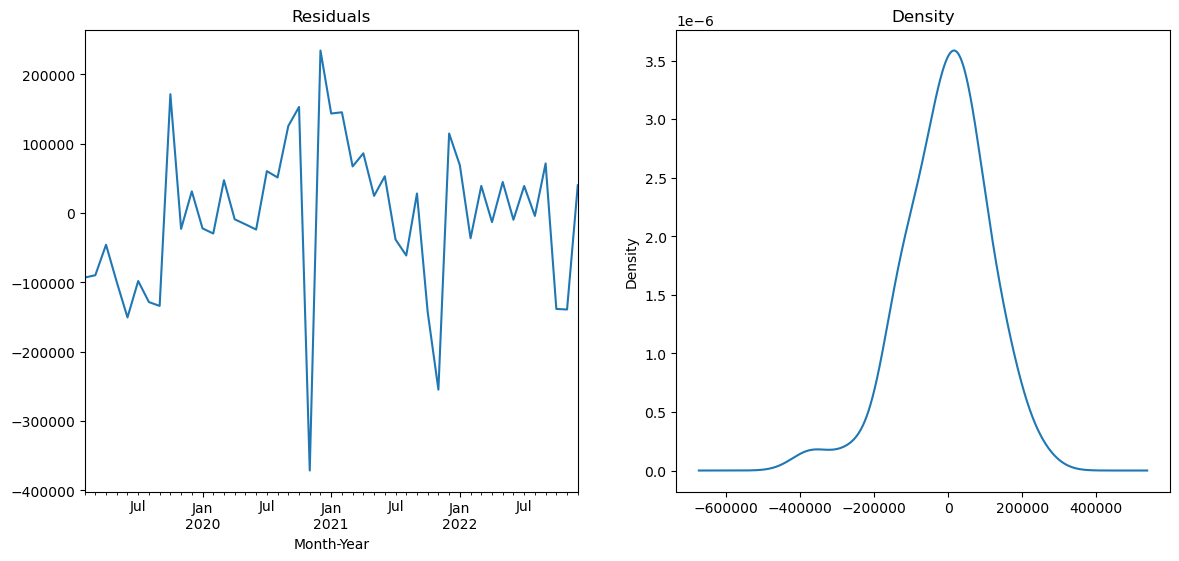

In [22]:
residuals= model_arima.resid[1:]
fig,ax=plt.subplots(1,2, figsize=(14, 6))
residuals.plot(title='Residuals',ax=ax[0])
residuals.plot(title='Density',kind='kde',ax=ax[1])
plt.show()

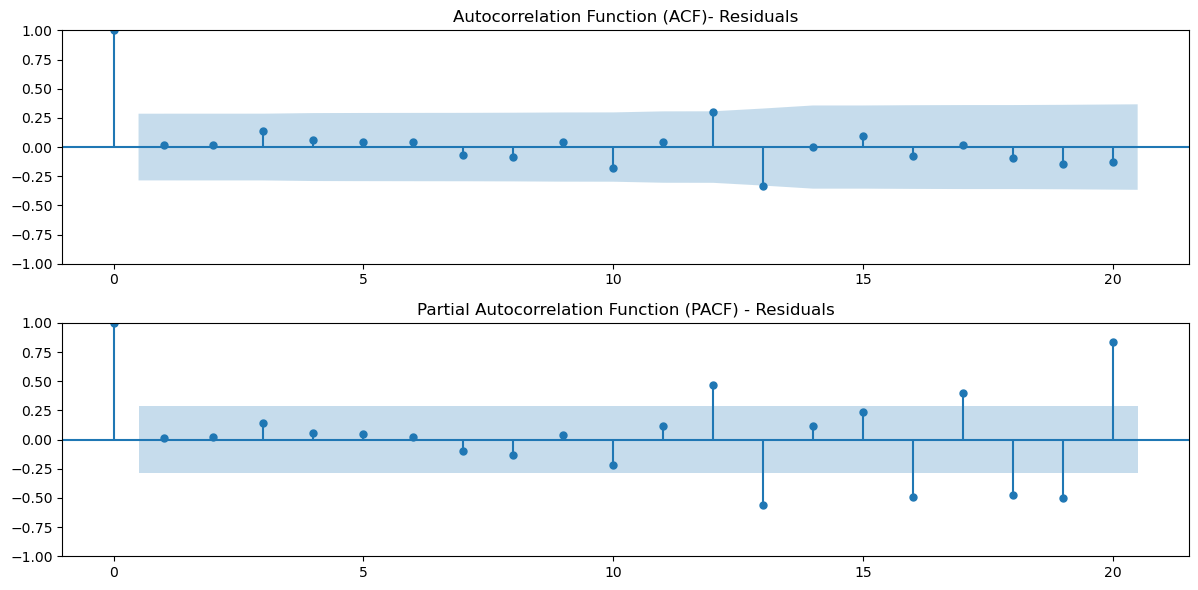

In [23]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(residuals, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)- Residuals')

plt.subplot(212)
plot_pacf(residuals, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Residuals')

plt.tight_layout()
plt.show()

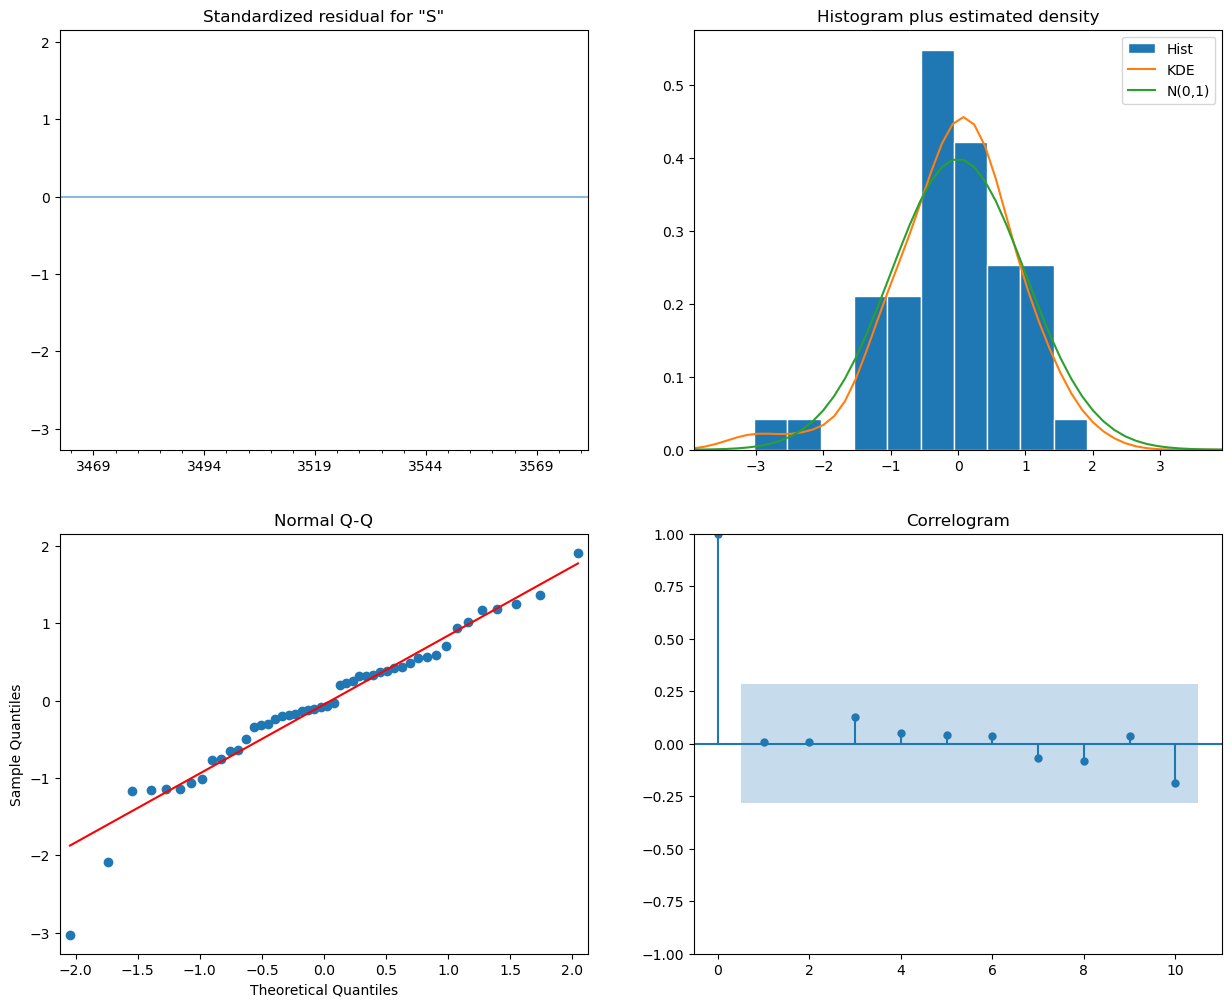

In [24]:
# Create the 4 diagostics plots
model_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [25]:
#pred_in_sample = model_arima.get_prediction(start=len(train), end=(len(sales_b)-1))
#sales_b['Forecast_ARIMA_p']=[None]*len(train) + list(pred)

In [26]:
#plt.figure(figsize=(12, 8))
#sns.lineplot(sales_b[['Sales','Forecast_ARIMA_p']])
#plt.title('Product B')
#plt.show()

In [27]:
pred=model_arima.predict(start=len(train), end=(len(sales_c)-1), exog=test[['Market Size','Marketing Expense']], dynamic = True)
sales_c['Forecast_ARIMAX']=[None]*len(train) + list(pred)
#sales_b.plot()

In [28]:
#pred=model_arima.forecast(steps= len(test))
#sales_b['Forecast_ARIMA']=[None]*len(train) + list(pred)
#sales_b.plot()

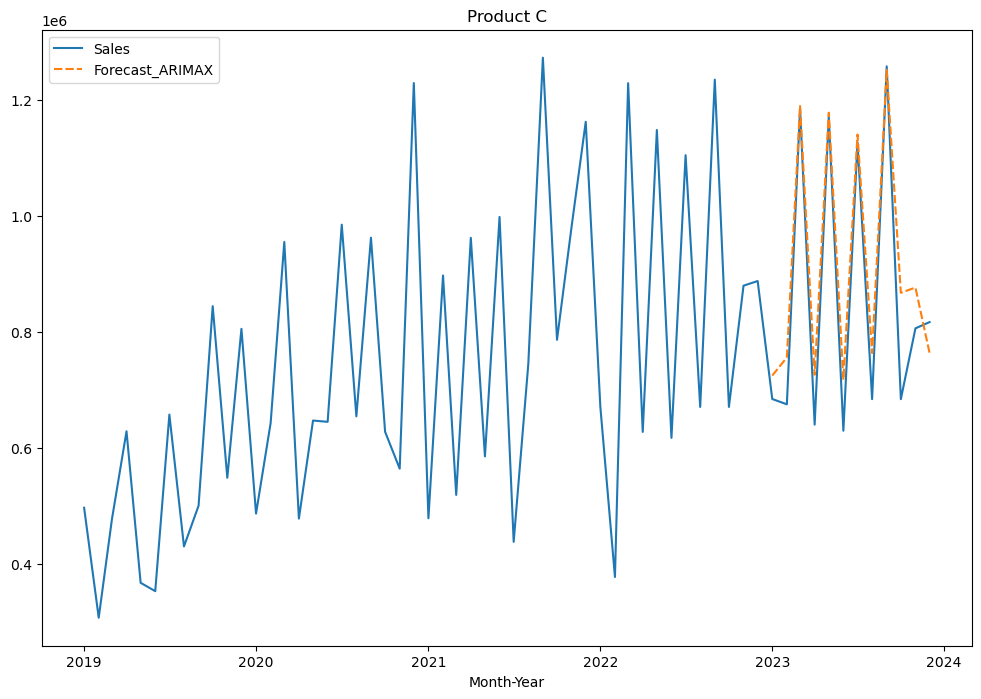

In [29]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_c[['Sales','Forecast_ARIMAX']])
plt.title('Product C')
plt.show()

In [30]:
mae_arimax= mean_absolute_error(test['Sales'],pred)
mse_arimax=mean_squared_error(test['Sales'], pred)
mape_arimax= mean_absolute_percentage_error(test['Sales'],pred)
rmse_arimax= np.sqrt(mean_squared_error(test['Sales'],pred))

print(f'MAE - ARIMAX: {mae_arimax}')
print(f'MAPE - ARIMAX: {mape_arimax}')
print(f'MSE - ARIMAX: {mse_arimax}')
print(f'RMSE - ARIMAX: {rmse_arimax}')

MAE - ARIMAX: 59489.08920014464
MAPE - ARIMAX: 0.08480739377258283
MSE - ARIMAX: 5957715412.070248
RMSE - ARIMAX: 77186.23848893175


# SARIMA

In [31]:
import statsmodels.api as sm

In [32]:
# Plot
#fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
#axes[0].plot(sales_c['Sales'], label='Original Series')
#axes[0].plot(sales_c['Sales'].diff(1), label='Usual Differencing')
#axes[0].set_title('Usual Differencing')
#axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
#axes[1].plot(sales_c['Sales'], label='Original Series')
#axes[1].plot(sales_c['Sales'].diff(12), label='Seasonal Differencing', color='green')
#axes[1].set_title('Seasonal Differencing')
#plt.legend(loc='upper left', fontsize=10)
#plt.suptitle('Product C', fontsize=16)
#plt.show()

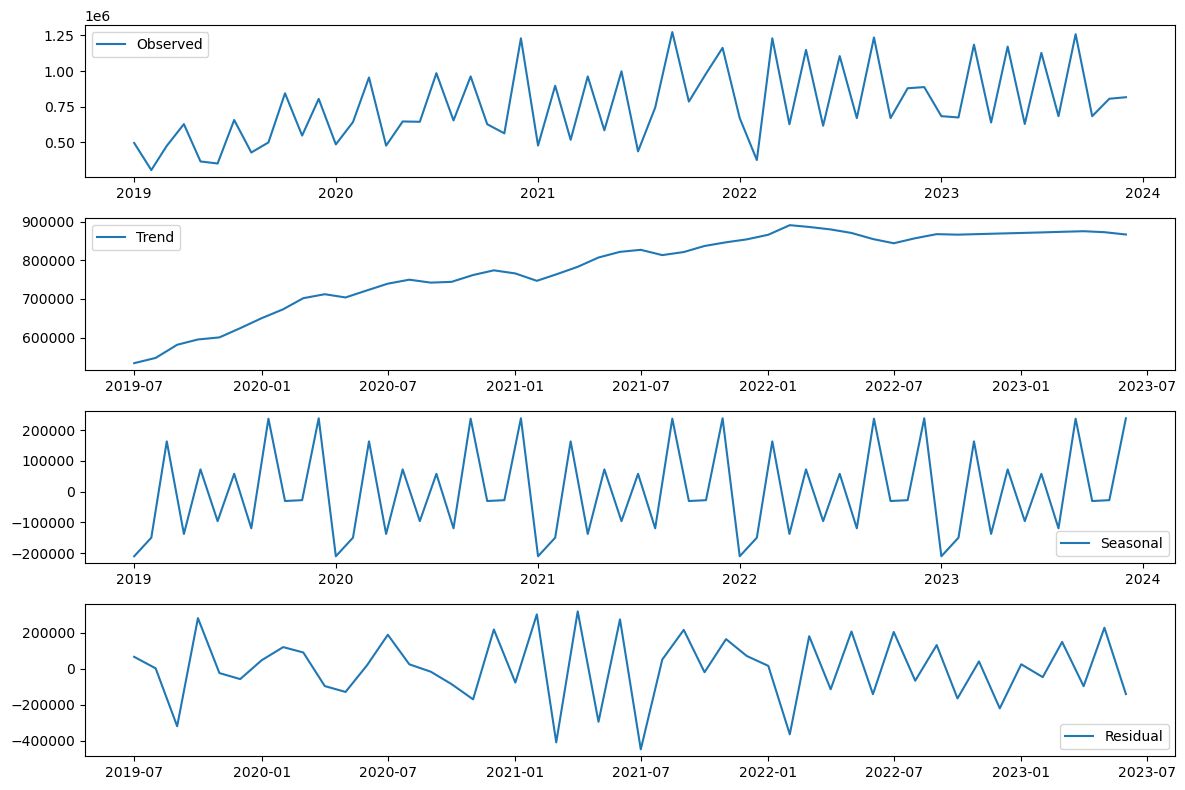

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_c['Sales'], model='additive', period=12)

# Plot the decomposition
#fig = decomposition.plot(figsize=(12,8))
#plt.show()
# Create a new figure with the specified size
plt.figure(figsize=(12, 8))

# Plot each component separately
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend()

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend()

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

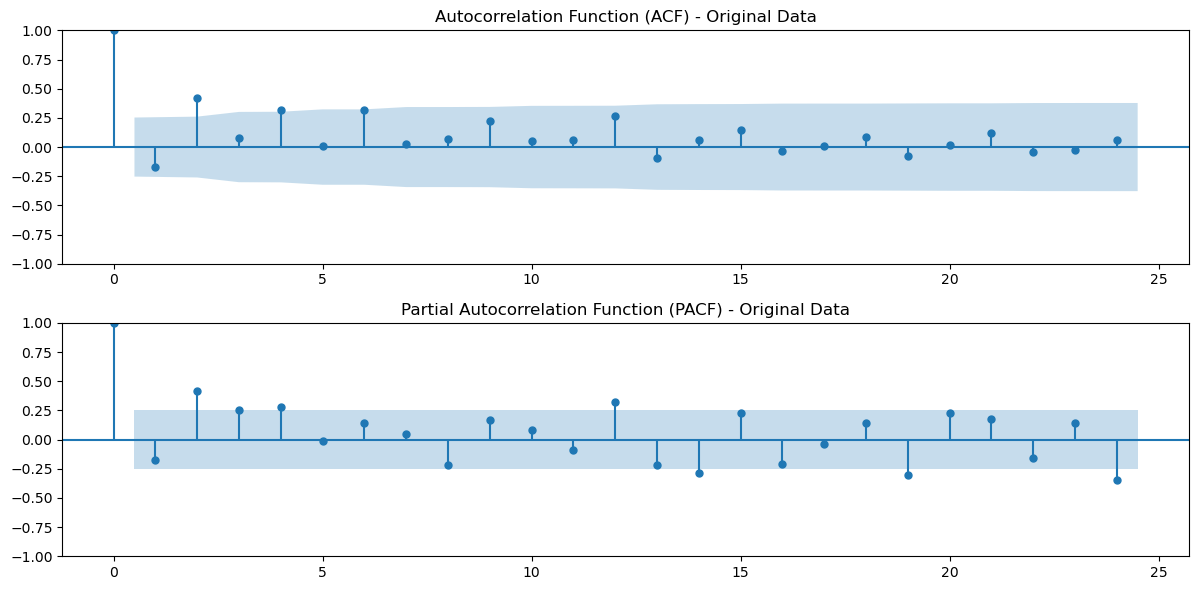

In [34]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(211)
plot_acf(sales_c['Sales'], lags=24, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) - Original Data')

plt.subplot(212)
plot_pacf(sales_c['Sales'], lags=24, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF) - Original Data')

plt.tight_layout()
plt.show()

In [39]:
order_SARIMAX=[]
# Loop over P order
for P in range(5):
    # Loop over Q order
    for Q in range(3):
        # Fit model
        model_s = sm.tsa.statespace.SARIMAX(train['Sales'], order=(0, 0, 1), seasonal_order=(P, 0, Q, 12),exog=train[['Market Size','Marketing Expense']])
        model_test_s = model_s.fit() 
        pred = model_test_s.predict(start=48, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])
        mae = mean_absolute_error(test['Sales'], pred)
        mse = mean_squared_error(test['Sales'], pred)
        # Add order and scores to list        
        order_SARIMAX.append((P, Q, model_test_s.aic, model_test_s.bic, mae, mse))

# Make DataFrame of model order and scores
order_SARIMAX_df = pd.DataFrame(order_SARIMAX, columns=['P', 'Q', 'aic', 'bic', 'mae', 'mse'])


In [40]:
# Sort by AIC
print(order_SARIMAX_df.sort_values('aic'))

    P  Q          aic          bic           mae           mse
1   0  1  1275.209200  1284.565205  78404.737332  7.642394e+09
3   1  0  1276.046402  1285.402407  73845.600624  6.280307e+09
6   2  0  1276.324744  1287.551950  84063.298077  8.495104e+09
2   0  2  1276.933617  1288.160823  74700.644105  6.900557e+09
4   1  1  1277.030811  1288.258017  76257.966747  7.084006e+09
9   3  0  1277.842070  1290.940477  92405.371446  1.134439e+10
7   2  1  1277.964343  1291.062751  88180.319238  9.734658e+09
5   1  2  1278.821259  1291.919666  77535.433228  7.207705e+09
12  4  0  1279.842114  1294.811722  92392.231617  1.132581e+10
10  3  1  1279.842505  1294.812113  92229.592625  1.128831e+10
8   2  2  1279.862781  1294.832389  91275.194527  1.087475e+10
13  4  1  1281.842061  1298.682870  92417.421564  1.134580e+10
11  3  2  1281.851909  1298.692718  92631.200793  1.137816e+10
0   0  0  1282.018290  1289.503094  90857.315748  1.041846e+10
14  4  2  1283.842194  1302.554204  92384.833969  1.133

In [41]:
sarima=sm.tsa.statespace.SARIMAX(train['Sales'],order=(0, 0, 1),seasonal_order=(0,0,1,12),exog=train[['Market Size','Marketing Expense']])
sarima_model=sarima.fit()
print(sarima_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(0, 0, 1)x(0, 0, 1, 12)   Log Likelihood                -632.605
Date:                            Thu, 09 May 2024   AIC                           1275.209
Time:                                    16:16:11   BIC                           1284.565
Sample:                                01-01-2019   HQIC                          1278.745
                                     - 12-01-2022                                         
Covariance Type:                              opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Market Size           0.6585      0.016     40.520      0.000       0.627       0.690
Marketing Expe

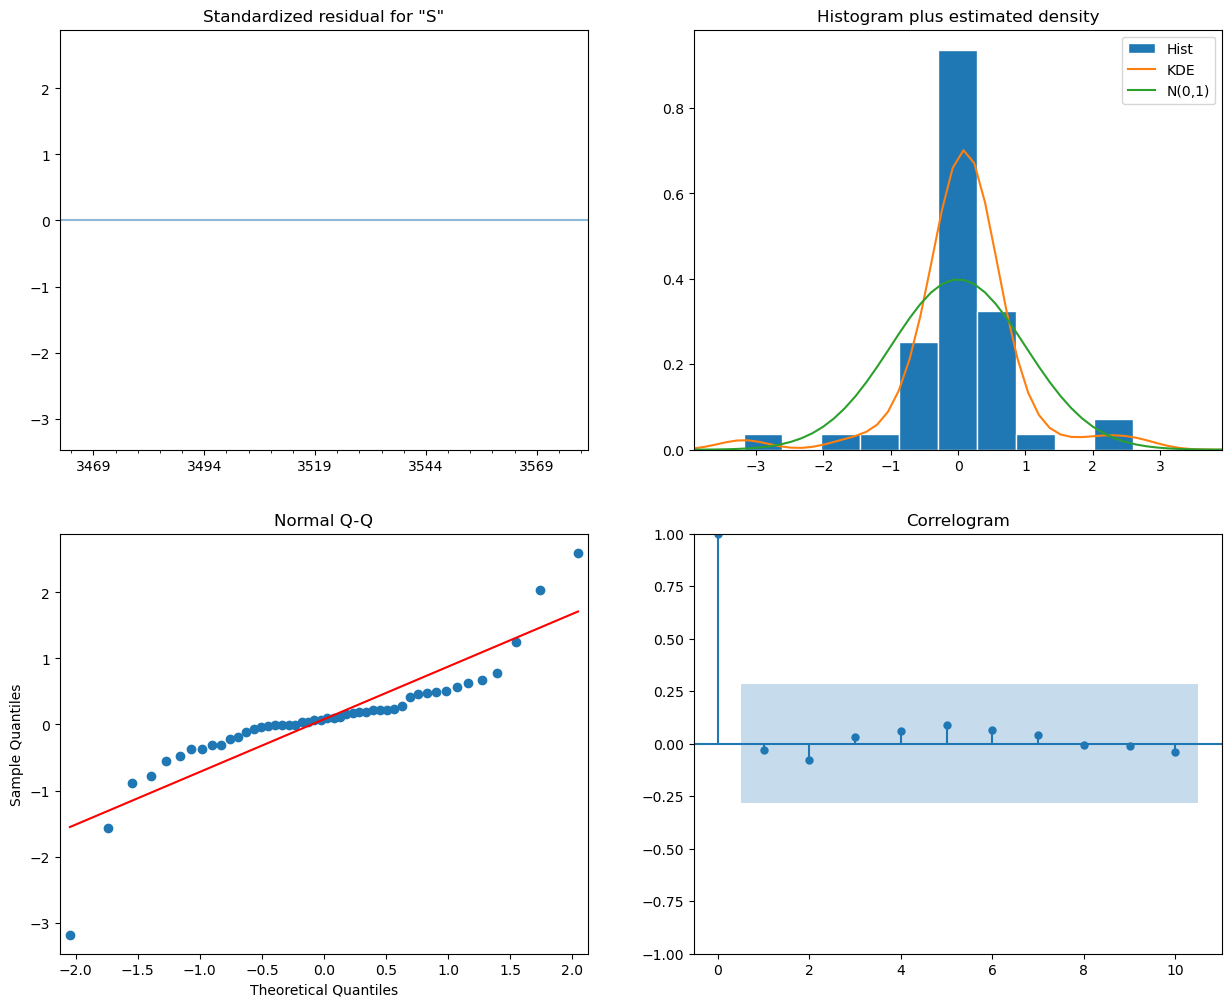

In [42]:
sarima_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [43]:
forecast_test_sarima=sarima_model.predict(start=48, end=59, dynamic=True, exog=test[['Market Size','Marketing Expense']])

In [44]:
sales_c['Forecast_SARIMAX']=[None]*len(train)+ list(forecast_test_sarima)
#sales_b[['Sales','Forecast_SARIMA']].plot(figsize=(12,8))

Text(0.5, 1.0, 'Product C')

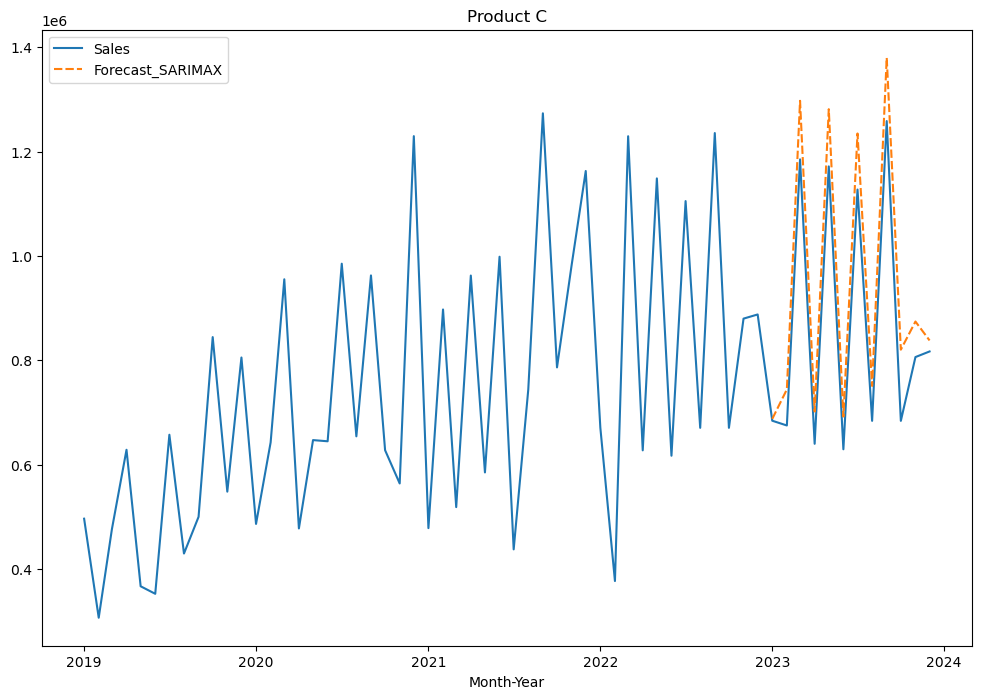

In [45]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_c[['Sales','Forecast_SARIMAX']])
plt.title('Product C')

In [46]:
mae_sarimax= mean_absolute_error(test['Sales'],forecast_test_sarima)
mape_sarimax= mean_absolute_percentage_error(test['Sales'],forecast_test_sarima)
mse_sarimax=mean_squared_error(test['Sales'], forecast_test_sarima)
rmse_sarimax= np.sqrt(mean_squared_error(test['Sales'],forecast_test_sarima))

print(f'MAE - SARIMAX: {round(mae_sarimax,3)}')
print(f'MAPE - SARIMAX: {round(mape_sarimax,3)}')
print(f'MSE - SARIMAX: {round(mse_sarimax,3)}')
print(f'RMSE - SARIMAX: {round(rmse_sarimax,3)}')

MAE - SARIMAX: 78404.737
MAPE - SARIMAX: 0.091
MSE - SARIMAX: 7642393592.163
RMSE - SARIMAX: 87420.785


# AUTO-ARIMA

In [47]:
import pmdarima as pm

In [48]:
auto_arima= pm.auto_arima(train['Sales'], start_p=0, d=0, start_q=0, max_p=5,max_q=3,
                          start_P=0, D=0, start_Q=0, max_P=5 ,max_Q=3 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima

 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1338.547, Time=0.03 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=1340.171, Time=0.04 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=1341.240, Time=0.09 sec
 ARIMA(0,0,0)(0,0,3)[12] intercept   : AIC=1342.833, Time=0.50 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=1340.510, Time=0.05 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=1342.170, Time=0.19 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=1343.223, Time=0.14 sec
 ARIMA(0,0,0)(1,0,3)[12] intercept   : AIC=1344.795, Time=0.51 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=1342.503, Time=0.13 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=1343.148, Time=0.25 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=1345.120, Time=0.96 sec
 ARIMA(0,0,0)(2,0,3)[12] intercept   : AIC=1346.794, Time=1.16 sec
 ARIMA(0,0,0)(3,0,0)[12] intercept   : AIC=1342.855, Time=0.49 sec
 ARIMA(0,0,0)(3,0,1)[12] intercept   : AIC=1344.772, Time=0.73 sec
 ARIMA(0,0,0)(3,0,2)[12] intercept   : AIC=1346.769, Time=0.95

ARIMA(order=(4, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True)

In [49]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(4, 0, 0)   Log Likelihood                -659.892
Date:                Thu, 09 May 2024   AIC                           1331.785
Time:                        16:18:16   BIC                           1343.012
Sample:                    01-01-2019   HQIC                          1336.028
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.755e+05   1.48e+05      2.543      0.011    8.61e+04    6.65e+05
ar.L1         -0.2924      0.174     -1.677      0.094      -0.634       0.049
ar.L2          0.2347      0.118      1.985      0.047       0.003       0.466
ar.L3          0.2943      0.123      2.394      0.017       0.053       0.535
ar.L4          0.2513      0.171      1.466      0.143      -0.085       0.587
sigma2       4.68e+10      0.093   5.06e+11      0.000    4.68e+10    4.68e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.07
Prob(Q):                              0.86   Prob(JB):                         0.97
Heteroskedasticity (H):               1.92   Skew:                             0.09
Prob(H) (two-sided):                  0.20   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.71e+28. Standard errors may be unstable.
"""

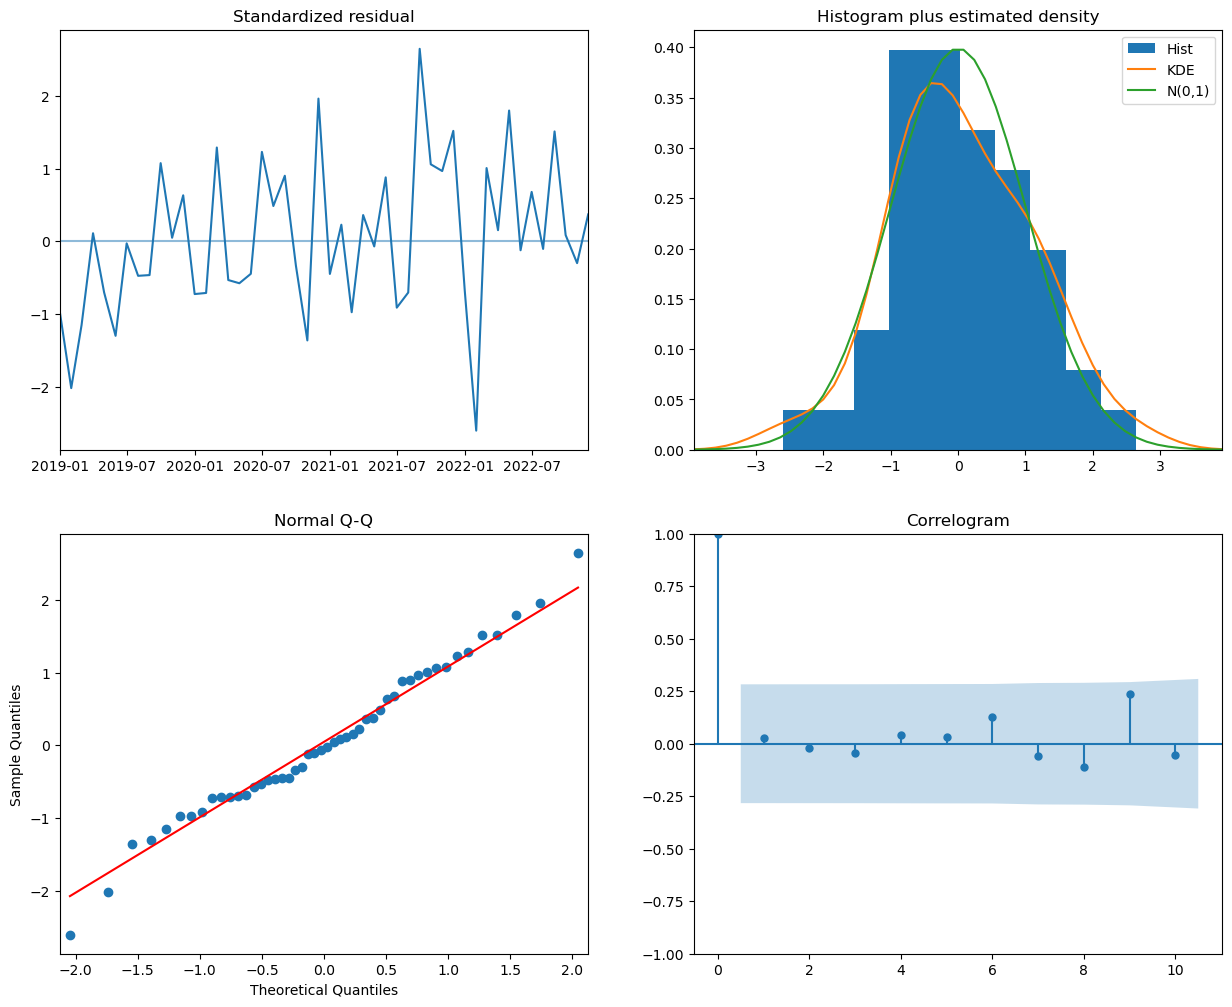

In [50]:
auto_arima.plot_diagnostics(figsize=(15, 12))
plt.show()

In [51]:
forecast_test_auto= auto_arima.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_c['Forecast_AUTO ARIMAX']=[None]*len(train)+ list(forecast_test_auto)
#sales_b[['Sales','Forecast_AUTO ARIMA']].plot()

Text(0.5, 1.0, 'Product C')

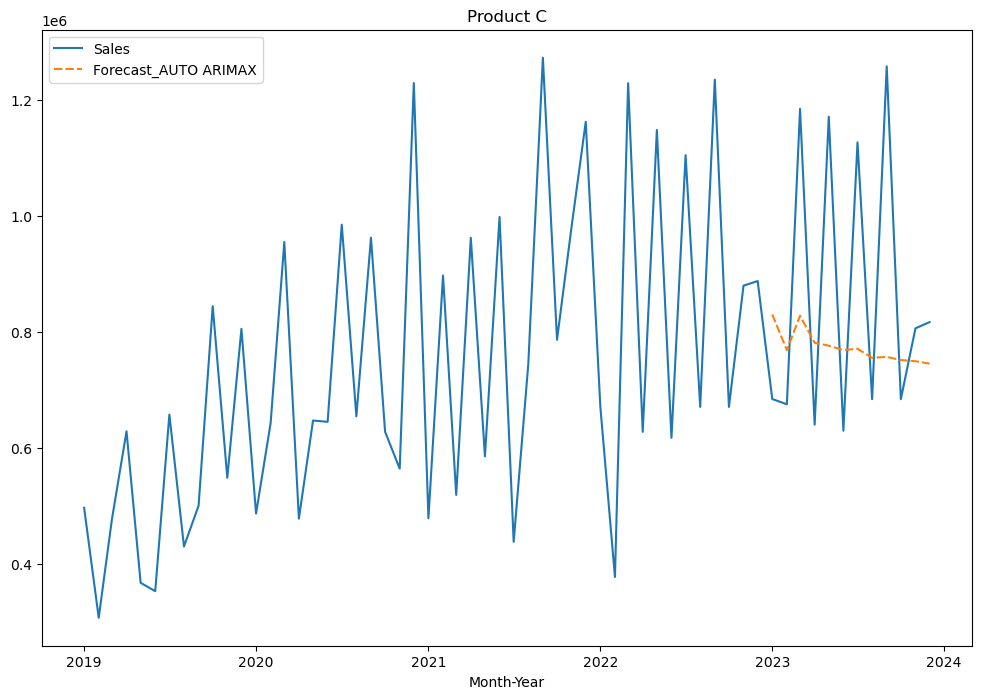

In [52]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_c[['Sales','Forecast_AUTO ARIMAX']])
plt.title('Product C')

In [53]:
mae_auto_arimax= round(mean_absolute_error(test['Sales'],forecast_test_auto),3)
mape_auto_arimax= round(mean_absolute_percentage_error(test['Sales'],forecast_test_auto),3)
mse_auto_arimax=round(mean_squared_error(test['Sales'],forecast_test_auto),3)
rmse_auto_arimax= round(np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto)),3)

print(f'MAE - AUTO ARIMAX: {mae_auto_arimax}')
print(f'MAPE - AUTO ARIMAX: {mape_auto_arimax}')
print(f'MSE - AUTO ARIMAX: {mse_auto_arimax}')
print(f'RMSE - AUTO ARIMAX: {rmse_auto_arimax}')

MAE - AUTO ARIMAX: 199889.34
MAPE - AUTO ARIMAX: 0.209
MSE - AUTO ARIMAX: 62532689047.828
RMSE - AUTO ARIMAX: 250065.37


In [126]:
sales_c.tail(12)

,Sales,Market Size,Marketing Expense,Forecast_ARIMAX,Forecast_SARIMAX,Forecast_AUTO ARIMAX
Month-Year,,,,,,
2023-01-01,684175,1198238,333991,7.246774e+05,7.253585e+05,8.974861e+05
2023-02-01,675038,1182240,329531,7.559614e+05,7.375004e+05,7.033598e+05
2023-03-01,1185258,2075812,578603,1.190134e+06,1.316676e+06,1.216773e+06
2023-04-01,639923,1120744,312389,7.260815e+05,6.972889e+05,9.187245e+05
2023-05-01,1171761,2052183,572015,1.178654e+06,1.280050e+06,1.130172e+06
2023-06-01,629400,1102308,307252,7.171235e+05,6.959696e+05,9.575809e+05
2023-07-01,1127413,1974516,550365,1.140917e+06,1.256116e+06,1.148585e+06
2023-08-01,683935,1197820,333874,7.635314e+05,7.584421e+05,9.422132e+05
2023-09-01,1258717,2204473,614464,1.252649e+06,1.382243e+06,1.381655e+06


In [127]:
sales_c.mean()

Sales                   7.599849e+05
Market Size             1.263304e+06
Marketing Expense       5.537495e+05
Forecast_ARIMAX         9.131326e+05
Forecast_SARIMAX        9.517060e+05
Forecast_AUTO ARIMAX    1.055910e+06
dtype: float64

In [129]:
data = {
    'model': ['ARIMAX', 'AUTO ARIMAX', 'SEASONAL ARIMAX'],
    'MAE': [mae_arimax, mae_auto_arimax, mae_sarimax],  
    'MAPE': [mape_arimax, mape_auto_arimax, mape_sarimax],  
    'MSE': [mse_arimax, mse_auto_arimax, mse_sarimax],  
    'RMSE': [rmse_arimax, rmse_auto_arimax, rmse_sarimax]  
}

model_results = pd.DataFrame(data)
model_results.set_index('model', inplace=True)
model_results

,MAE,MAPE,MSE,RMSE
model,,,,
ARIMAX,59489.089200,0.084807,5.957715e+09,77186.238489
AUTO ARIMAX,199278.574000,0.271000,5.932151e+10,243560.076000
SEASONAL ARIMAX,119091.205199,0.140443,1.925297e+10,138755.083549


In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_c[['Sales','Forecast_ARIMAX','Forecast_SARIMAX','Forecast_AUTO ARIMAX']])
plt.title('Product C')

# TESTING

In [18]:
auto_arima_1= pm.auto_arima(train['Sales'], start_p=0, d=None, start_q=0, max_p=5,max_q=3,
                          start_P=0, D=None, start_Q=0, max_P=2 ,max_Q=2 ,  
                          stepwise=False, trace=True,
                          seasonal=True,m=12, exogenous=train[['Market Size','Marketing Expense']])
auto_arima_1

 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1349.237, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1351.027, Time=0.04 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=1352.324, Time=0.14 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1350.979, Time=0.04 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1352.392, Time=0.15 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=1354.210, Time=0.28 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=1352.267, Time=0.11 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=1354.210, Time=0.25 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=1356.209, Time=0.54 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1317.151, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1319.078, Time=0.06 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1320.413, Time=0.20 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1318.277, Time=0.07 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=0.47 sec
 ARIM

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True)

In [19]:
auto_arima_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -645.629
Date:                Wed, 08 May 2024   AIC                           1299.258
Time:                        18:47:36   BIC                           1306.659
Sample:                    01-01-2019   HQIC                          1302.043
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    3.03e+04   1.11e+04      2.729      0.006    8539.484    5.21e+04
ar.L1         -0.5673      0.150     -3.787      0.000      -0.861      -0.274
ma.L1         -0.7461      0.139     -5.383      0.000      -1.018      -0.474
sigma2       5.25e+10      0.006   8.38e+12      0.000    5.25e+10    5.25e+10
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 4.81
Prob(Q):                              0.80   Prob(JB):                         0.09
Heteroskedasticity (H):               2.61   Skew:                            -0.44
Prob(H) (two-sided):                  0.06   Kurtosis:                         4.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.38e+28. Standard errors may be unstable.
"""

In [20]:
forecast_test_auto_1= auto_arima_1.predict(n_periods=len(test), exogenous=test[['Market Size','Marketing Expense']])
sales_c['Forecast_AUTO ARIMA_1']=[None]*len(train)+ list(forecast_test_auto_1)

Text(0.5, 1.0, 'Product C')

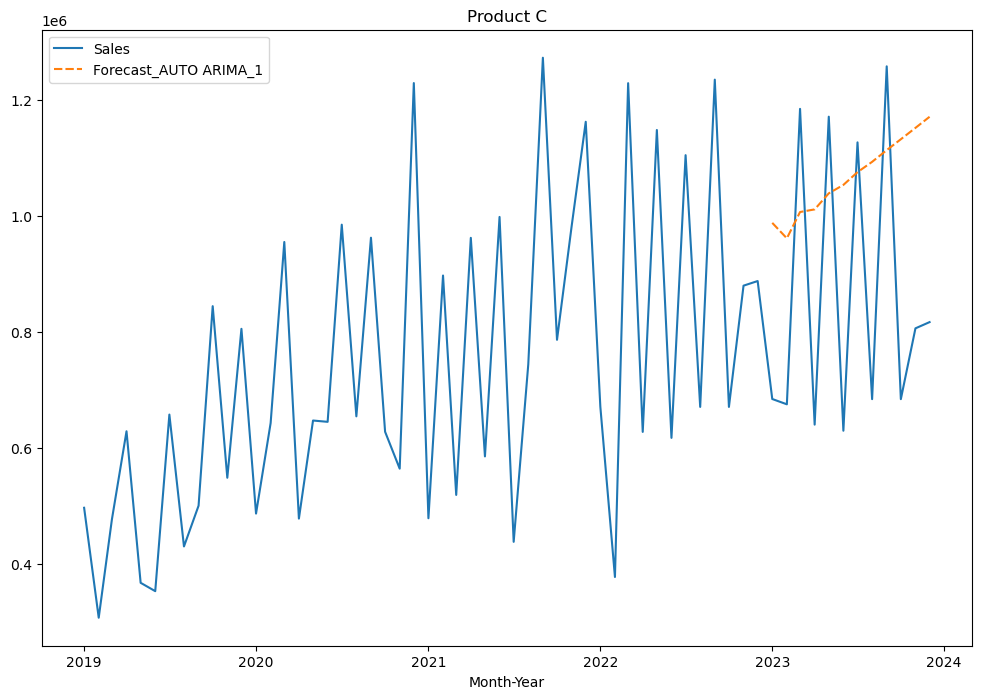

In [21]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_c[['Sales','Forecast_AUTO ARIMA_1']])
plt.title('Product C')

In [23]:
mae_auto_arima_1= mean_absolute_error(test['Sales'],forecast_test_auto_1)
mape_auto_arima_1= mean_absolute_percentage_error(test['Sales'],forecast_test_auto_1)
mse_auto_arima_1=mean_squared_error(test['Sales'],forecast_test_auto_1)
rmse_auto_arima_1= np.sqrt(mean_squared_error(test['Sales'],forecast_test_auto_1))

print(f'MAE - AUTO ARIMA: {mae_auto_arima_1}')
print(f'MAPE - AUTO ARIMA: {mape_auto_arima_1}')
print(f'MSE - AUTO ARIMA: {mse_auto_arima_1}')
print(f'RMSE - AUTO ARIMA: {rmse_auto_arima_1}')

MAE - AUTO ARIMA: 287776.2171141219
MAPE - AUTO ARIMA: 0.3889602560690184
MSE - AUTO ARIMA: 98416798538.3998
RMSE - AUTO ARIMA: 313714.517576729
